In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from pygoogle_image import image as pi
import random
import PIL
import pickle 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
data = "dataset_train"
categories = ['Real', 'AIGenerated']

In [5]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path, img))
        if img_array is None:
            print(f"Failed to load image: {img}")
            continue
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array / 255
        training_data.append([new_array, classes])


In [6]:
len(training_data), training_data[0][0].shape

(102105, (48, 48, 3))

In [7]:
random.shuffle(training_data)

In [8]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [9]:
X_train.shape

(102105, 48, 48, 3)

In [10]:
y_train.shape

(102105,)

In [11]:
X_train[0].shape

(48, 48, 3)

In [12]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [13]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [14]:
X_train.shape

(102105, 48, 48, 3)

In [15]:
y_train.shape

(102105,)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\thanu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [20]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

Epoch 1/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 123s 46ms/step - accuracy: 0.7217 - loss: 0.5360 - val_accuracy: 0.8181 - val_loss: 0.4036
Epoch 2/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 105s 41ms/step - accuracy: 0.8533 - loss: 0.3383 - val_accuracy: 0.8641 - val_loss: 0.3237
Epoch 3/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 104s 41ms/step - accuracy: 0.8792 - loss: 0.2852 - val_accuracy: 0.8863 - val_loss: 0.2736
Epoch 4/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 109s 43ms/step - accuracy: 0.8936 - loss: 0.2572 - val_accuracy: 0.8987 - val_loss: 0.2490
Epoch 5/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.8997 - loss: 0.2424 - val_accuracy: 0.9129 - val_loss: 0.2158
Epoch 6/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 102s 40ms/step - accuracy: 0.9100 - loss: 0.2232 - val_accuracy: 0.8909 - val_loss: 0.2638
Epoch 7/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 120s 47ms/step - accuracy: 0.9109 - loss: 0.2176 - val_accuracy: 0.9213 - val_loss: 0.2001
Epoch 8/30
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 118s 46ms/step - accuracy: 

In [21]:
model.save("Model.h5")

In [ ]:
#model.save("AIGeneratedModel.h5")

In [22]:
model_new = keras.models.load_model("Model.h5")

In [23]:
data = "C:/Users/thanu/Desktop/DL Project/test"
categories = ['REAL', 'FAKE']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])
        
random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [25]:
model_new.evaluate(X_test, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9241 - loss: 0.1896


[0.19361340999603271, 0.9225500226020813]

In [26]:
y_pred = model_new.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step


In [27]:
X_test.shape

(20000, 48, 48, 3)

In [28]:
y_test.shape

(20000,)

In [29]:
y_pred.shape

(20000, 1)

In [30]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [31]:
y_predicted.shape

(20000,)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     10000
           1       0.96      0.89      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [54]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] >= 0.5:
        print("The given image is AI Generated.")
    else:
        print("The given image is Real.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
The given image is AI Generated.


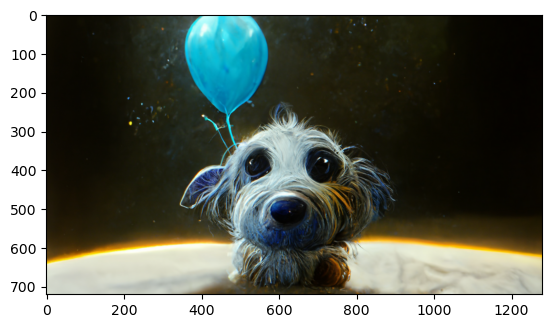

In [55]:
path_img = "dataset_train/AIGenerated/dalle2 generated images_55.png"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The given image is Real.


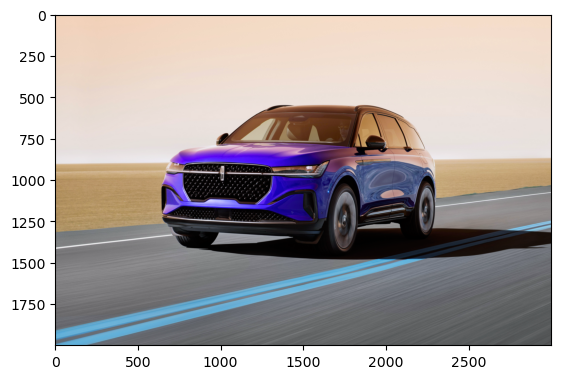

In [56]:
path_img = 'dataset_train/Real/vehicles_23.jpeg'
find_out(path_img)

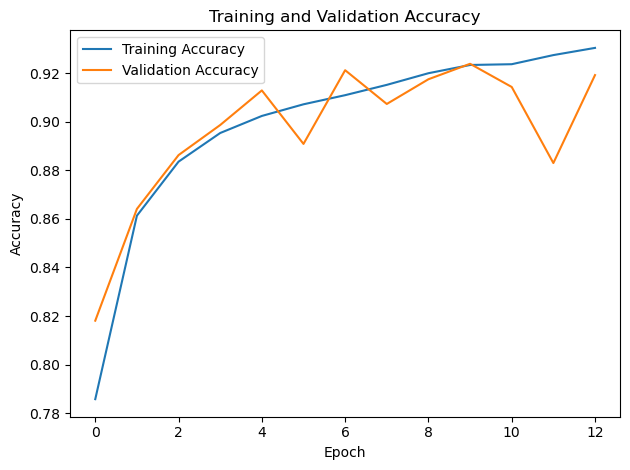

In [57]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

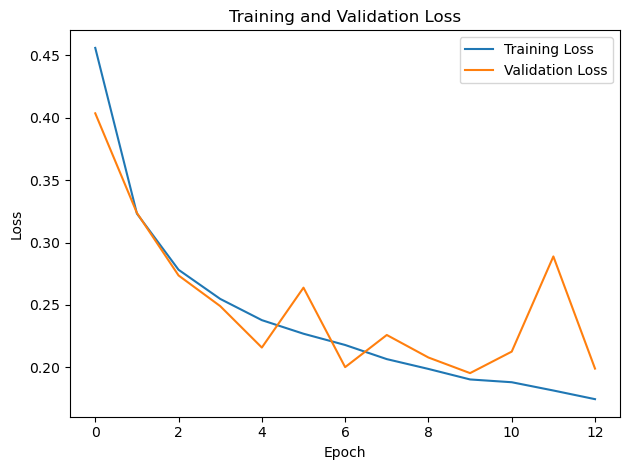

In [58]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()